# Configuración de datos y parámetros del algoritmo de Random Forest

### Importamos librerias 

In [1]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import seaborn as sns

In [3]:
df = pd.read_csv("./dataset/predictive_maintenance_transform.csv")
df

,Ubicación,Potencia,Autoprotección,Promedio de DDT,Máximo de DDT,tasa de quema,Criticidad-Nivel Ceráunico,Conectores amobibles,Tipo de clientes,Número de usuarios,EENS,Tipo de instalación,Red Aérea,Cola de circuito,km de red BT,Estado del transformador
0,1,112.5,0,3.155602,6.6,0.00,0,1,1,94,1822.5,1,1,0,0.32362,0
1,1,10.0,0,3.155602,6.6,0.00,0,1,2,1,270.0,1,1,0,0.30036,0
2,1,25.0,0,3.155602,6.6,0.00,0,1,1,74,405.0,1,1,0,0.29695,0
3,1,75.0,0,3.155602,6.6,0.00,0,1,3,30,1215.0,1,1,0,0.12575,0
4,1,75.0,0,3.155602,6.6,0.00,0,1,4,24,1215.0,1,1,1,0.16605,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,0,37.5,0,3.155602,6.6,0.00,0,0,5,30,796.5,2,1,0,0.80303,0
15869,0,37.5,0,4.148532,8.3,0.25,0,1,5,57,607.5,2,1,0,146419.00000,0
15870,0,25.0,0,3.850980,6.1,0.00,0,0,5,21,855.0,2,1,1,0.73990,0
15871,0,10.0,0,0.717021,2.5,0.00,1,1,5,10,162.0,2,1,0,176708.00000,0


In [4]:
values = df["Estado del transformador"].value_counts()

### Representación del desblance de datos

0    15066
1      807
Name: Estado del transformador, dtype: int64

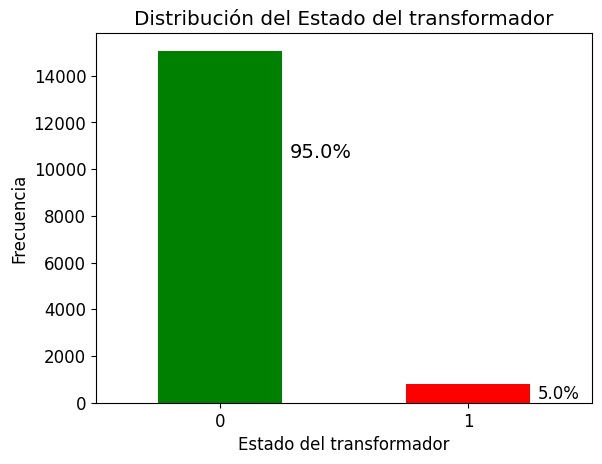

In [5]:
import matplotlib
font = {'size'   : 12}
matplotlib.rc('font', **font)


pd.value_counts(df["Estado del transformador"]).plot.bar(rot=0, color=["green", "red"])
plt.title('Distribución del Estado del transformador')
plt.xlabel('Estado del transformador')
plt.ylabel('Frecuencia')
plt.text(0.28, 10500,str(round(values[0]/(values[0]+values[1]),2)*100) + "%", fontsize=14)
plt.text(1.28, 150,  str(round(values[1]/(values[0]+values[1]),2)*100) + "%", fontsize=12)

df["Estado del transformador"].value_counts()

### Reducción de ejemplos de entrenamiento

In [6]:
data_0 = df[df["Estado del transformador"] == 0]
data_1 = df[df["Estado del transformador"] == 1]
data_0.shape, data_1.shape

((15066, 16), (807, 16))

In [7]:
data_0 = data_0.sample(n = int(1e+3))
data_0.shape

(1000, 16)

In [8]:
df = data_1.append(data_0)
df["Estado del transformador"].value_counts()

C:\Users\Victor\AppData\Local\Temp\ipykernel_7776\2724416060.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_1.append(data_0)


0    1000
1     807
Name: Estado del transformador, dtype: int64

In [356]:
df

,Ubicación,Potencia,Autoprotección,Promedio de DDT,Máximo de DDT,tasa de quema,Criticidad-Nivel Ceráunico,Conectores amobibles,Tipo de clientes,Número de usuarios,EENS,Tipo de instalación,Red Aérea,Cola de circuito,km de red BT,Estado del transformador
10,1,112.5,0,3.155602,6.6,0.00,0,1,1,39,1822.5,1,1,1,0.18860,1
61,1,112.5,0,3.155602,6.6,0.00,0,1,6,146,1822.5,3,1,0,0.34724,1
264,1,10.0,0,3.155602,6.6,0.00,0,1,3,2,162.0,2,1,0,0.26430,1
282,1,75.0,0,3.155602,6.6,0.00,0,1,1,76,1215.0,2,1,1,0.39051,1
348,1,75.0,1,3.155602,6.6,0.25,0,1,5,73,1215.0,1,1,1,0.61925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,0,15.0,0,1.039696,4.3,0.00,1,0,5,11,351.0,2,1,0,0.73527,0
5931,0,25.0,0,0.717021,2.5,0.00,1,1,5,12,405.0,4,1,0,17169.00000,0
14555,0,15.0,0,4.868885,11.7,0.75,1,1,5,8,243.0,2,1,0,143201.00000,0
7770,0,5.0,0,0.717021,2.5,0.50,0,1,5,4,81.0,2,1,1,163397.00000,0


### División del dataset en variables X y Y

In [9]:
X = df.drop(columns = ["Estado del transformador"] , axis=1)
y = df["Estado del transformador"]

### División del dataset en variables de entrenamiento y evaluación

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Variables dispuestas para el entrenamiento

In [11]:
print((y_train == 0).sum())
print((y_train == 1).sum())

802
643


In [12]:
pd.value_counts(y_train)[0]

802

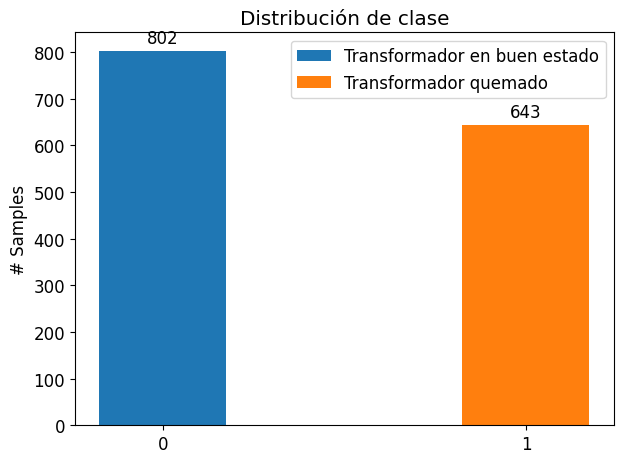

In [13]:
fig, ax = plt.subplots()
rects1 = ax.bar(0, pd.value_counts(y_train)[0], 0.35, label='Transformador en buen estado')
rects2 = ax.bar(1, pd.value_counts(y_train)[1], 0.35, label='Transformador quemado')
ax.set_ylabel('# Samples')
ax.set_title('Distribución de clase')
ax.set_xticks([0,1])
ax.set_xticklabels(['0','1'])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()

In [14]:
def plot_classes(X, y, title, var1,var2, xlab, ylab):
    plt.figure()
    plt.scatter(X[:,var1][y != 1],X[:,var2][y != 1], c="m", alpha=0.2)
    plt.scatter(X[:,var1][y == 1],X[:,var2][y == 1], c="c")
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid()
    plt.show()

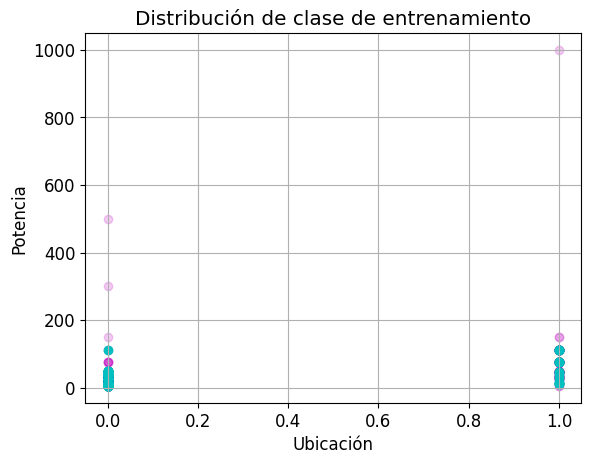

In [15]:
plot_classes(X_train.values,y_train.values, "Distribución de clase de entrenamiento", 0,1, df.columns[0], df.columns[1])

## Clasificación con 1445 ejemplos

In [16]:
def classif_model(X_train, y_train):
    clf = RandomForestClassifier(n_estimators=300,
                                 max_depth=4,
                                 criterion='gini',
                                 random_state=1)
    clf.fit(X_train, y_train)
    return clf

def prediction(X_test,clf):
    y_pred_prob = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    return y_pred_prob, y_pred


clf = classif_model(X_train,y_train)
y_pred_prob, y_pred = prediction(X_test,clf) 

F1: 0.73  -- prec: 0.78  -- recall: 0.69  -- acc: 0.77


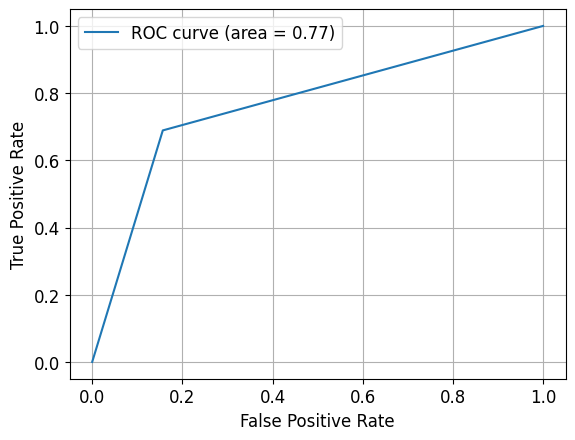

,0,1,accuracy,macro avg,weighted avg
precision,0.766055,0.784722,0.773481,0.775389,0.774512
recall,0.843434,0.689024,0.773481,0.766229,0.773481
f1-score,0.802885,0.733766,0.773481,0.768325,0.771571
support,198.000000,164.000000,0.773481,362.000000,362.000000


[[167  31]
 [ 51 113]]


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


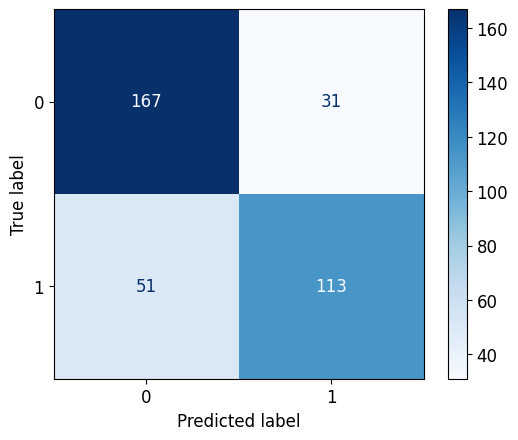

In [17]:
def show_metrics(y_test, y_pred):
    fpr, tpr, ths = roc_curve(y_test,  y_pred)
    auc_ = auc(fpr, tpr)
    f1 = f1_score(y_test,  (y_pred>.5))
    prec = precision_score(y_test,  (y_pred>.5))
    rec = recall_score(y_test,  (y_pred>.5))
    acc = accuracy_score(y_test,  (y_pred>.5))
    print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)
    
    cm = confusion_matrix(y_test, y_pred)

    plt.plot(fpr,tpr, label='ROC curve (area = %.2f)' %auc_)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()
    d = classification_report(y_test, y_pred,output_dict=True)
    display(pd.DataFrame.from_dict(d))
    
    
show_metrics(y_test, y_pred)
cm_0 = confusion_matrix(y_test, y_pred)
print(cm_0)
plot_confusion_matrix(clf, X_test, y_test, cmap = plt.cm.Blues)

## Clasificación con datos balanceados

In [18]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

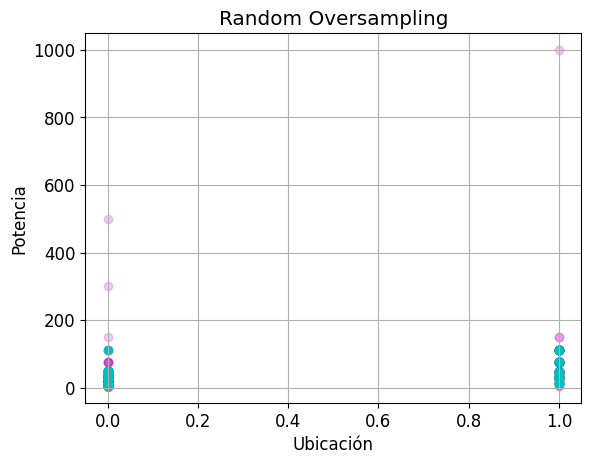

In [19]:
plot_classes(X_ros.values,y_ros.values, 
             "Random Oversampling", 0,1, df.columns[0], df.columns[1])

F1: 0.73  -- prec: 0.64  -- recall: 0.85  -- acc: 0.72


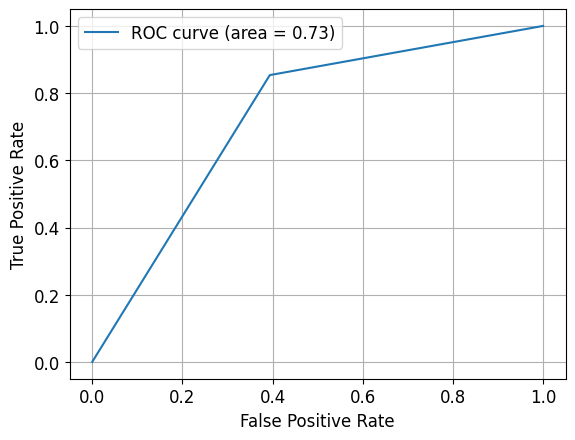

,0,1,accuracy,macro avg,weighted avg
precision,0.833333,0.642202,0.718232,0.737768,0.746743
recall,0.606061,0.853659,0.718232,0.729860,0.718232
f1-score,0.701754,0.732984,0.718232,0.717369,0.715903
support,198.000000,164.000000,0.718232,362.000000,362.000000


[[120  78]
 [ 24 140]]


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


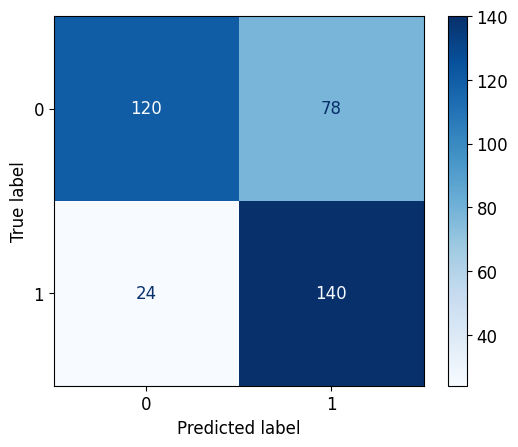

In [20]:
clf_ros = classif_model(X_ros, y_ros)
y_pred_prob_ros , y_pred_ros = prediction(X_test, clf_ros)
show_metrics(y_test, y_pred_ros)

cm = confusion_matrix(y_test, y_pred_ros)
print(cm)
plot_confusion_matrix(clf_ros, X_test, y_test, cmap = plt.cm.Blues)

## Balanceo de datos con SMOTE

In [21]:
from imblearn.over_sampling import SMOTE

X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)

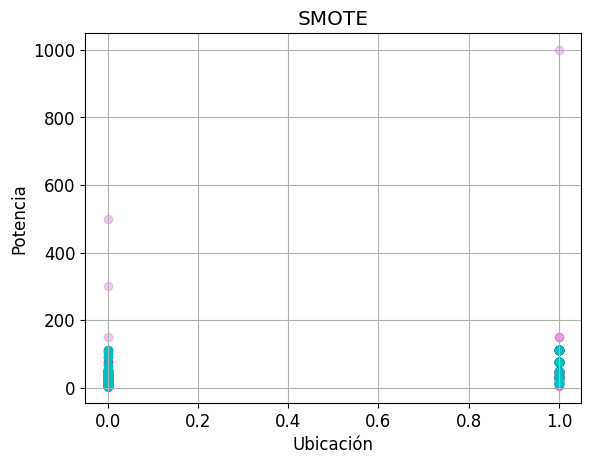

In [22]:
plot_classes(X_smote.values,y_smote.values, 
             "SMOTE", 0,1, df.columns[0], df.columns[1])

F1: 0.73  -- prec: 0.64  -- recall: 0.85  -- acc: 0.71


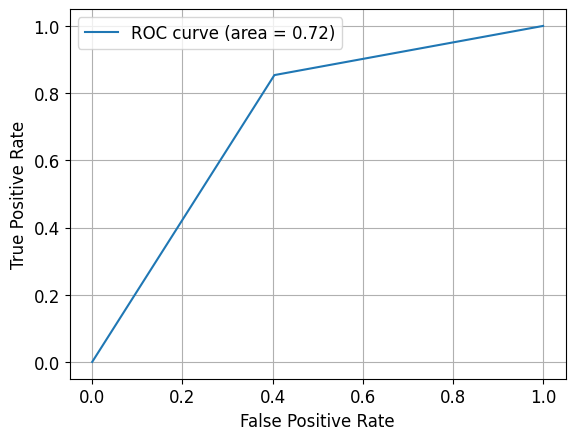

,0,1,accuracy,macro avg,weighted avg
precision,0.830986,0.636364,0.712707,0.733675,0.742814
recall,0.595960,0.853659,0.712707,0.724809,0.712707
f1-score,0.694118,0.729167,0.712707,0.711642,0.709996
support,198.000000,164.000000,0.712707,362.000000,362.000000


[[118  80]
 [ 24 140]]


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


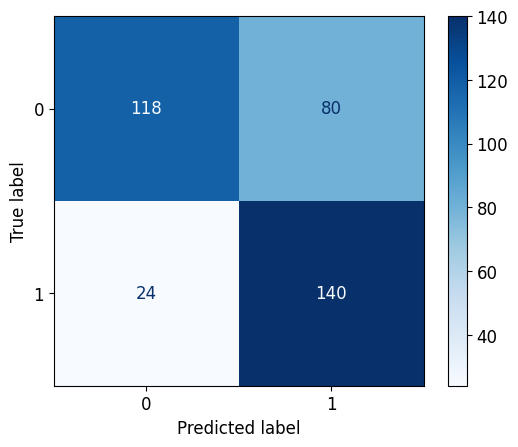

In [23]:
clf_smt = classif_model(X_smote, y_smote)
y_pred_prob_smt , y_pred_smt = prediction(X_test, clf_smt)
show_metrics(y_test, y_pred_smt)

cm = confusion_matrix(y_test, y_pred_smt)
print(cm)

plot_confusion_matrix(clf_smt, X_test, y_test, cmap = plt.cm.Blues)

### Importancia de las variables

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

clf.feature_importances_

array([5.97157993e-02, 1.78632555e-01, 3.75022472e-01, 3.54431617e-02,
       2.68665557e-02, 8.35489747e-03, 3.65250830e-03, 8.28608899e-03,
       2.31094181e-02, 5.47187273e-02, 1.47891596e-01, 3.77930182e-02,
       6.72307212e-05, 1.92194525e-03, 3.85240266e-02])

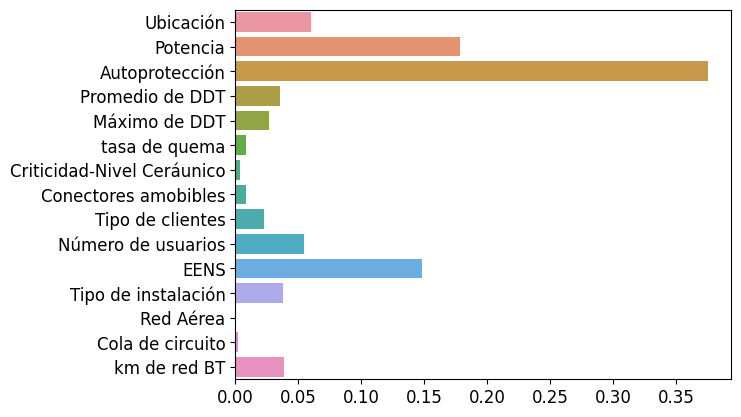

In [39]:
sns.barplot(y = X.columns, x = clf.feature_importances_);

## Serialización del modelo

In [2]:
import joblib

In [25]:
joblib.dump(clf, 'modelo_entrenado.pkl')

['modelo_entrenado.pkl']

## Cargado del modelo

In [3]:
modelo = joblib.load('modelo_entrenado.pkl')

## Testeo del modelo entrenado para el datset del año 2019

In [4]:
df2 = pd.read_csv("./dataset/predictive_maintenance_transform.csv")
df2

,Ubicación,Potencia,Autoprotección,Promedio de DDT,Máximo de DDT,tasa de quema,Criticidad-Nivel Ceráunico,Conectores amobibles,Tipo de clientes,Número de usuarios,EENS,Tipo de instalación,Red Aérea,Cola de circuito,km de red BT,Estado del transformador
0,1,112.5,0,3.155602,6.6,0.00,0,1,1,94,1822.5,1,1,0,0.32362,0
1,1,10.0,0,3.155602,6.6,0.00,0,1,2,1,270.0,1,1,0,0.30036,0
2,1,25.0,0,3.155602,6.6,0.00,0,1,1,74,405.0,1,1,0,0.29695,0
3,1,75.0,0,3.155602,6.6,0.00,0,1,3,30,1215.0,1,1,0,0.12575,0
4,1,75.0,0,3.155602,6.6,0.00,0,1,4,24,1215.0,1,1,1,0.16605,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,0,37.5,0,3.155602,6.6,0.00,0,0,5,30,796.5,2,1,0,0.80303,0
15869,0,37.5,0,4.148532,8.3,0.25,0,1,5,57,607.5,2,1,0,146419.00000,0
15870,0,25.0,0,3.850980,6.1,0.00,0,0,5,21,855.0,2,1,1,0.73990,0
15871,0,10.0,0,0.717021,2.5,0.00,1,1,5,10,162.0,2,1,0,176708.00000,0


In [5]:
X_data = df2.drop(columns = ["Estado del transformador"] , axis=1)
y_data = df2["Estado del transformador"]

In [6]:
y_predict_rf = modelo.predict(X_data)

In [7]:
rf_accuracy = round(accuracy_score(y_data, y_predict_rf)*100, 2)

print("Exactitud del modelo :",rf_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_data, y_predict_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Exactitud del modelo : 91.15 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95     15066
           1       0.32      0.64      0.43       807

    accuracy                           0.91     15873
   macro avg       0.65      0.78      0.69     15873
weighted avg       0.95      0.91      0.93     15873

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


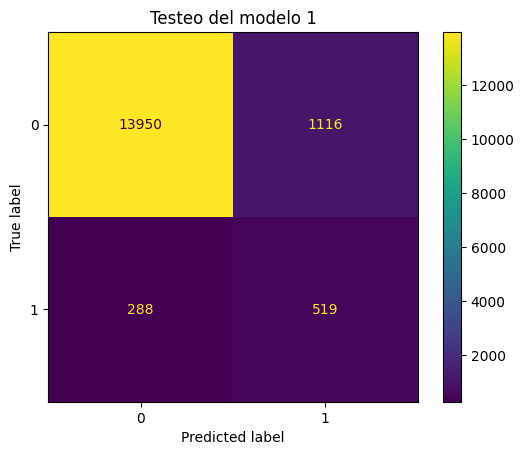

In [8]:
plot_confusion_matrix(modelo, X_data, y_data);
plt.title("Testeo del modelo 1")
plt.show()